<a href="https://colab.research.google.com/github/gifcolls/Walmart-s-Sales-Forecasting-/blob/main/Sales_Forecasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Forecasting and Market Analysis Project

## Objective
The goal of this project is to predict future sales for a retail company based on historical sales data. This analysis will account for external factors such as holidays, economic conditions, and marketing efforts, aiming to provide actionable insights for inventory and promotional planning.


## Data Collection

The dataset for this project is sourced from historical sales data covering the period from 2010-02-05 to 2012-11-01, titled `Walmart_Store_sales`. This dataset provides a detailed breakdown of weekly sales across various Walmart stores, offering insights into sales trends, the impact of holidays, and other economic factors. Below is a summary of the fields contained in the dataset:

- `Store`: The store number.
- `Date`: The week of sales, serving as an indicator of the time series aspect of the data.
- `Weekly_Sales`: Sales figures for the given store in a particular week.
- `Holiday_Flag`: Indicates whether the week includes a major holiday (1 = Holiday week, 0 = Non-holiday week).
- `Temperature`: The temperature on the day of sale, which might influence sales patterns.
- `Fuel_Price`: The cost of fuel in the region, reflecting broader economic conditions.
- `CPI`: The prevailing Consumer Price Index, indicating the level of inflation.
- `Unemployment`: The prevailing unemployment rate, another economic indicator.

### Holiday Events

The dataset marks several key holiday events, which are historically associated with significant shifts in sales volumes:

- **Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- **Labour Day**: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- **Thanksgiving**: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- **Christmas**: 25-Dec-10



## Importing Dataset from Kaggle

This section outlines the steps taken to import the dataset directly from Kaggle into this Google Colab notebook. We are using the Kaggle API for this purpose, which requires setup and authentication steps detailed below.

### Kaggle API Key Setup

To access Kaggle datasets directly through the API, you first need to obtain your `kaggle.json` API key file:

1. Go to the Kaggle website and log in.
2. Click on your profile picture on the top right and go to 'My Account'.
3. Scroll down to the 'API' section and click on 'Create New API Token'.
4. This will download a `kaggle.json` file containing your API credentials.
5.  Manually upload your kaggle.json file to the root of your Google Drive.
6. Set up the Kaggle API environment in Google Colab as follow:

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Install Kaggle library
!pip install kaggle

# Make .kaggle directory
!mkdir -p ~/.kaggle

# Copy the kaggle.json file into this directory
!cp "/content/drive/My Drive/Colab Notebooks/kaggle.json" /root/.kaggle/


# Set permissions for the file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d yasserh/walmart-dataset

# Unzip the dataset
!unzip walmart-dataset.zip

# If the dataset is named 'Walmart_Store_sales.csv' after unzipping and you want to use it directly:
import pandas as pd
df = pd.read_csv('Walmart.csv')

Mounted at /content/drive
  0% 0.00/122k [00:00<?, ?B/s]
100% 122k/122k [00:00<00:00, 60.5MB/s]
Archive:  walmart-dataset.zip
  inflating: Walmart.csv             


#Initial Exploratory Data Analysis (EDA) before Data Preparation:
Load and Initial Data Overview

In [ ]:
# Import the necessary libraries
import pandas as pd #  for data manipulation and analysis
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  #  for data visualization
import seaborn as sns #  for data visualization
# For Machine Learning
from sklearn.model_selection import train_test_split  # for splitting the dataset into training and testing sets.
from sklearn.linear_model import LinearRegression     # for implementing the linear regression model.

# Display the DataFrame
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# Understand the Dataset Structure:
Before diving into deep data cleaning and preparation, some level of initial EDA is beneficial. This preliminary exploration helps identify obvious issues and informs how you prepare your data.

Using df.info() to review columns, data types, and missing values.

In [ ]:
# Check data types
print("\nData info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB

Data info:
 None


The initial phase of our **Exploratory Data Analysis (EDA)** focuses on understanding the distribution and characteristics of key external factors — 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment' — alongside the primary variable of interest, 'Weekly_Sales'. This analysis is designed to unearth any underlying patterns, identify potential outliers, and assess the overall data quality. By examining these attributes , we aim to uncover insights that will directly inform and guide our subsequent data preparation efforts. This step is crucial for ensuring the integrity and reliability of our dataset, laying a solid foundation for deeper analysis and modeling aimed at forecasting weekly sales. Through this process, we seek to identify any necessary corrections, transformations, or cleaning operations that will optimize our dataset for accurate and meaningful analysis.


#Distribution Analysis of Temperature.

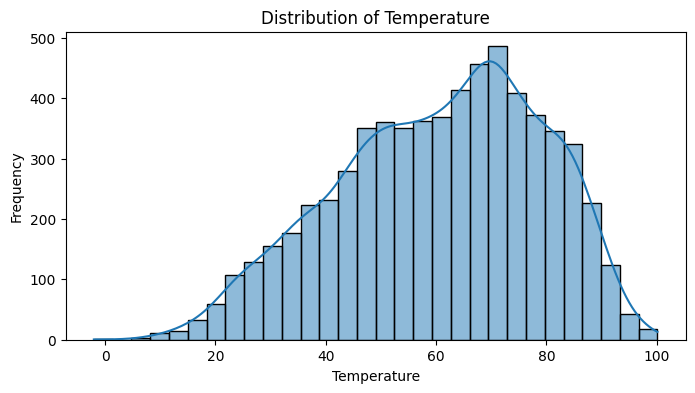

In [ ]:
#Temperature
plt.figure(figsize=(8, 4))
sns.histplot(df['Temperature'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


**Observation**: The histogram of the Temperature shows a unimodal distribution centered roughly in the 60 to 80 degrees range, with a slight skew to the right, indicating a higher frequency of warmer temperatures.

**Implications:** Based on the unimodal and slightly right-skewed distribution of temperature, data preparation will include assessing the need for any transformations to address skewness and considering the categorization of temperatures for use in predictive modeling


#Distribution Analysis of Fuel Price

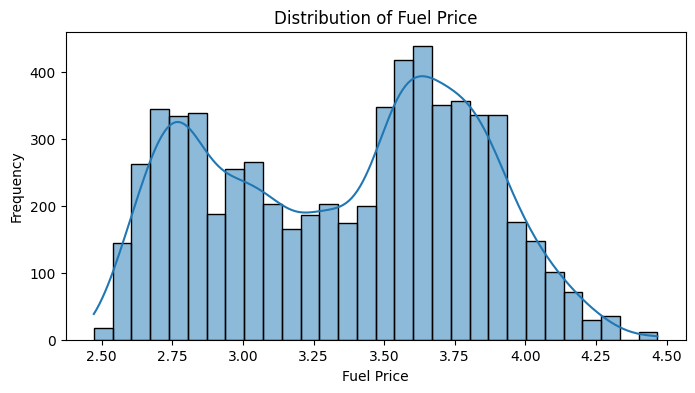

In [ ]:
#Fuel Price
plt.figure(figsize=(8, 4))
sns.histplot(df['Fuel_Price'], bins=30, kde=True)
plt.title('Distribution of Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Frequency')
plt.show()


**Observation:**The histogram from the Fuel Price shows a bimodal distribution with two peaks within the two most common price intervals.

**Implications:**
**Assessing Bimodality:** Before advancing to modeling, we need to recognize the presence of two prevalent price points in the dataset and consider their potential impact on sales trends.

**Price Categories:** We may initially prepare the data by creating binary indicators or categorical variables for the identified price ranges to explore their correlation with sales.

**Informing Future Modeling:** The recognition of bimodality will guide our future model choice, ensuring we choose or construct models capable of capturing the potential influence of different fuel price levels on sales.


#Distribution Analysis CPI (Consumer Price Index)

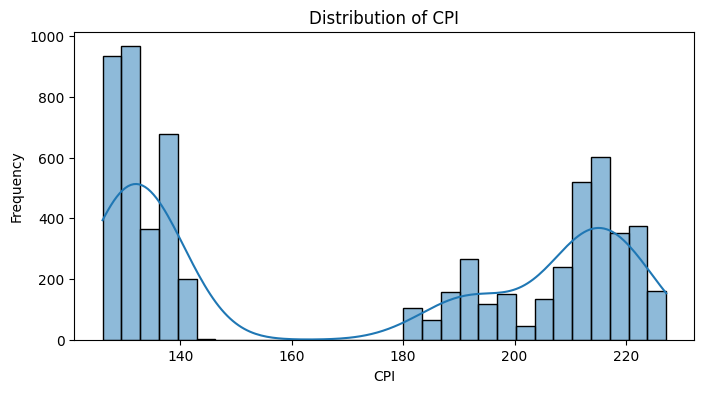

In [ ]:
#Consumer Price Index (CPI)
plt.figure(figsize=(8, 4))
sns.histplot(df['CPI'], bins=30, kde=True)
plt.title('Distribution of CPI')
plt.xlabel('CPI')
plt.ylabel('Frequency')
plt.show()


**Observation:** The CPI histogram reveals a multimodal distribution, suggesting distinct economic periods within the data.

**Implications:**
- Without additional economic context, the CPI's multimodal peaks will be treated as indicative of varying economic conditions.
- CPI data will be visualized over time to identify any temporal patterns or
shifts that might align with known economic events.
- The dataset will be provisionally segmented into CPI-based categories (e.g., low, medium, high) as a preliminary approach to model these variations.
- A correlation analysis between CPI and other variables such as unemployment and sales will be conducted to discern any patterns.
- Robust statistical methods that can adapt to different data regimes, like tree-based models, will be considered for forecasting to accommodate the observed variability in CPI.


#Distribution Analysis of Unemployment

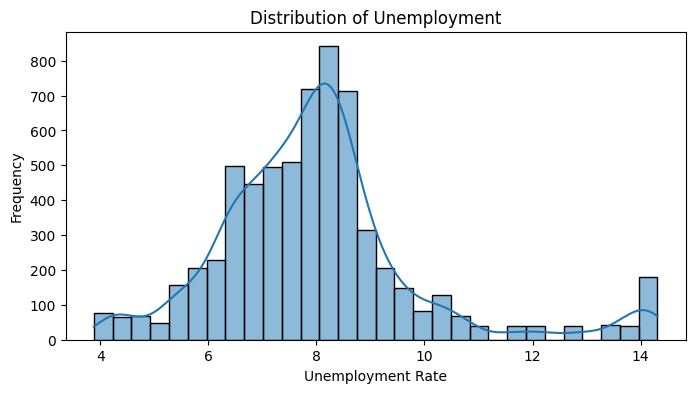

In [ ]:
#Unemployment
plt.figure(figsize=(8, 4))
sns.histplot(df['Unemployment'], bins=30, kde=True)
plt.title('Distribution of Unemployment')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()


**Observation:**The histogram shows a unimodal distibution wiht a peak aorund 8% of unemployment rate. There is another small peak around 14% wich may indicate a higher rate of unemployment but less frequent. This second peak is not notable enough to consider the distribution as bimodal, instead it can be consider as an outlier.

#Summary Statistics

In [ ]:
print(df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].describe())

       Temperature   Fuel_Price          CPI  Unemployment
count  6435.000000  6435.000000  6435.000000   6435.000000
mean     60.663782     3.358607   171.578394      7.999151
std      18.444933     0.459020    39.356712      1.875885
min      -2.060000     2.472000   126.064000      3.879000
25%      47.460000     2.933000   131.735000      6.891000
50%      62.670000     3.445000   182.616521      7.874000
75%      74.940000     3.735000   212.743293      8.622000
max     100.140000     4.468000   227.232807     14.313000


# Distribution Analysis of Weekly Sales
In this section, we analyze the distribution of weekly sales. The histogram below provides a visual representation of the sales frequency across different ranges.

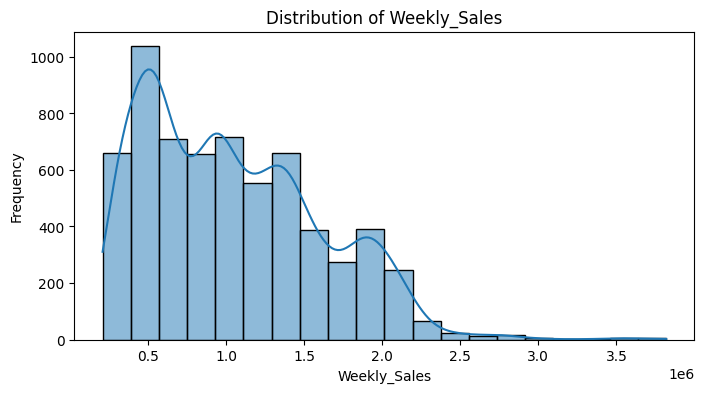

In [ ]:
# Visualizing Data Distributions:
# Plot histograms to visualize the distributions of numerical features.
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Weekly_Sales', bins=20, kde=True)
plt.title('Distribution of Weekly_Sales')
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

## Some insights from the Histogram
**Data distribution:** The histogram shows that the frequency of weekly sales decreases as the sales amount increases, which is typical for sales data as fewer weeks have very high sales.

**Most Common Values (Mode):** The peak of the histogram (the tallest bar) shows the most common range of weekly sales. This is between approximately 0.5 million and 1.0 million.



# Sales Analysis by Holiday Flag

In this section, we explore how weekly sales differ during holiday weeks compared to non-holiday weeks. We will use a box plot to visualize the median, quartiles, and outliers of the sales data for each category. This will help us understand the variations in sales during different periods.



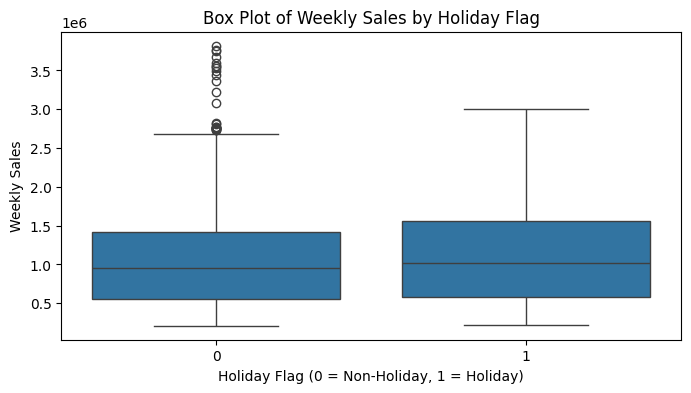

In [ ]:
# Exploring Relationships:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Holiday_Flag', y='Weekly_Sales')
plt.title('Box Plot of Weekly Sales by Holiday Flag')
plt.xlabel('Holiday Flag (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Weekly Sales')
plt.show()


## Observations from the Box Plot

After visualizing the weekly sales data, we can make the following observations:

- **Median Sales Comparison:** The median weekly sales, indicated by the line in the middle of the boxes, are quite similar between holiday and non-holiday weeks. There is a slight increase in median sales during holidays, which might suggest a minor impact of holidays on increasing sales.

- **Outliers Analysis:** Outliers, which are the data points outside the range of the 'whiskers', are present in both holiday and non-holiday weeks. These represent weeks with unusually high sales. Notably, the outliers for non-holiday weeks cover a more extensive range, suggesting that there are more significant spikes in sales during regular periods.

- **Variability in Sales:** The box for non-holiday weeks is taller, indicating a broader spread of sales data. This suggests that there is more variability in sales during non-holiday weeks compared to holiday weeks.


# Relationship between stores and weekly sales

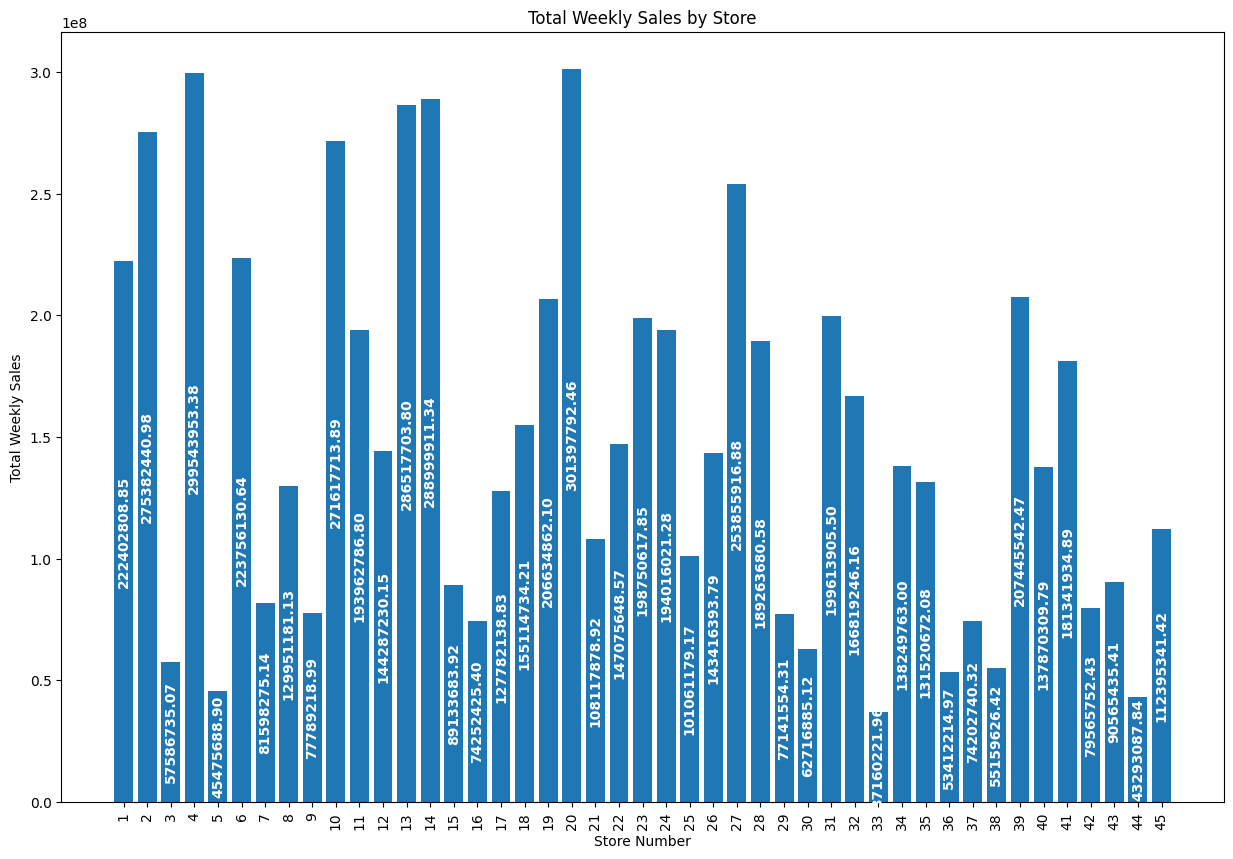

In [ ]:
# Create a bar chart
# Summarize weekly sales by store
store_sales_summary = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# store_sales_summary is the pre-defined DataFrame
plt.figure(figsize=(15, 10))
bars = plt.bar(store_sales_summary['Store'], store_sales_summary['Weekly_Sales'])

plt.title('Total Weekly Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Total Weekly Sales')

# Set x-axis labels to show each store number
plt.xticks(store_sales_summary['Store'])

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=90)

# Add the sales values vertically inside the bars without any formatting changes
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 0.5, f'{yval:.2f}',
             rotation=90,  # Rotate text vertically
             ha='center', va='center',  # Center the text horizontally and vertically
             color='white', fontweight='bold')  # Text in bold and white color for readability


### Total Weekly Sales by Store Histogram Analysis

Observation: The histogram represents the distribution of total weekly sales across different stores. Each bar corresponds to a store, and the height of the bar represents the aggregated weekly sales for that store over the data collection period. The values are represented in millions (e.g., a value of 2.5 on the y-axis corresponds to 2.5 million in sales). The distribution shows variability between stores, with some stores achieving significantly higher total sales than others.

Implications for Data Preparation:
- Considering the variability in sales among stores, it may be necessary to standardize or normalize the data if the modeling technique is sensitive to the scale of the data.
- The stores with exceptionally high or low sales could be further analyzed to understand the factors contributing to these sales figures.
- This variability also suggests that models may need to account for store-specific characteristics or include store as a categorical variable if predictive modeling is performed on a store-by-store basis.

In the next steps of data preparation, particular attention should be paid to:
- Investigating any outliers to ensure they represent true sales figures and not data entry errors.
- Considering segmenting the data by store type or location if these attributes are available and relevant.

###Data Cleaning and Preparation

## Checking for Missing Values

Before proceeding with further data cleaning steps, it's crucial to ensure that our dataset does not contain any missing values which could affect the quality of our analysis and predictive modeling. Missing data can lead to biased estimates and invalid conclusions.

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


The output from this check confirms that there are no missing values in our dataset. With this confirmation, we can move forward to more sophisticated data-cleaning tasks, such as outlier detection and normalization.

In [ ]:
# Define the function to detect outliers
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# List of columns you want to check for outliers
cols_to_check = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Dictionary to hold the outliers in each column
outliers_dict = {}

# Loop through each column to detect and store outliers
for col in cols_to_check:
    outliers = detect_outliers(df, col)
    outliers_dict[col] = outliers
    print(f"Number of Outliers in '{col}':", outliers.shape[0])

# Now you have a dictionary where each key is a column name and each value is the DataFrame of outliers for that column

# Example to access outliers for 'Weekly_Sales'
weekly_sales_outliers = outliers_dict['Weekly_Sales']
print(weekly_sales_outliers)


Number of Outliers in 'Weekly_Sales': 34
Number of Outliers in 'Temperature': 3
Number of Outliers in 'Fuel_Price': 0
Number of Outliers in 'CPI': 0
Number of Outliers in 'Unemployment': 481
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
189       2  24-12-2010    3436007.68             0        49.97       2.886   
241       2  23-12-2011    3224369.80             0        46.66       3.112   
471       4  26-11-2010    2789469.45             1        48.08       2.752   
474       4  17-12-2010    2740057.14             0        46.57       2.884   
475       4  24-12-2010    3526713.39             0        43.21       2.887   
523       4  25-11-2011    3004702.33             1        47.96       3.225   
526       4  16-12-2011    2771397.17             0        36.44       3.149   
527       4  23-12-2011    3676388.98             0        35.92       3.103   
761       6  24-12-2010    2727575.18             0        55.07       2.886   
1329     